In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
data = pd.read_csv('/content/sample_data/Kidney2025.csv' , delimiter=';')
print(data.head())

  Lack of Sufficient Urine Interruption of Urine Heartburn Blood in Urine  \
0                       No                   Yes        No             No   
1                       No                    No       Yes             No   
2                      Yes                    No       Yes            Yes   
3                      Yes                   Yes       Yes             No   
4                       No                    No       Yes             No   

  Change in Urine Color Pain in Sides Abdominal Blockage Fever Swelling  \
0                    No            No                 No    No       No   
1                    No            No                 No   Yes       No   
2                   Yes           Yes                Yes   Yes       No   
3                   Yes           Yes                 No   Yes      Yes   
4                   Yes            No                 No   Yes       No   

  Pale Skin             Diagnosis  
0        No        Chronic Kidney  
1       Yes  A

In [2]:
data['Diagnosis'].value_counts()

,count
Diagnosis,
Kidney Stones,23
Chronic Kidney,19
Pyelonephritis,11
Acute Kidney Failure,9
Bladder Infection,9
Kidney Inflammation,7
Kidney Cancer,1
Kidney Infection,1
Urinary Tract,1


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Split the dataset into features (X) and target (y)
X = data.drop('Diagnosis', axis=1)  # Features (everything except 'Diagnosis')
y = data['Diagnosis']  # Target (Diagnosis)
# Encode categorical features using LabelEncoder
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])
# Encode the target column (Diagnosis) if it's categorical
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Apply SMOTE to generate synthetic samples for the minority class with n_neighbors = 3
# smote = SMOTE(random_state=42, n_neighbors=1)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# # Output the resampled data shapes
# print(f"Original dataset shape: {X_train.shape}")
# print(f"Resampled dataset shape: {X_train_res.shape}")
# # Convert resampled data back to DataFrame
# X_train_resampled = pd.DataFrame(X_train_res, columns=X.columns)
# y_train_resampled = pd.Series(y_train_res)
# # Save the resampled data to CSV files
# X_train_resampled.to_csv('X_train_resampled.csv', index=False)
# y_train_resampled.to_csv('y_train_resampled.csv', index=False)

In [5]:
# Assuming 'df' is your DataFrame with features and target column 'Diagnosis'
df = data.copy()
# Encode categorical variables
label_encoder = LabelEncoder()
# Apply label encoding to all categorical columns
for column in df.columns[:-1]:  # Apply encoding to all columns except 'Diagnosis'
    df[column] = label_encoder.fit_transform(df[column])
# Encode the target column 'Diagnosis'
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
# Split features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# # Apply SMOTE to balance the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Define models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Dictionary to store results
results = {}
# Train, predict, and evaluate each model
for name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Store the results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
# Print the results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy'] * 100:.2f}%")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("-" * 50)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Model: Logistic Regression
Accuracy: 64.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.67      0.80         3
           2       0.75      0.75      0.75         8
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.55      1.00      0.71         6
           7       1.00      1.00      1.00         2

    accuracy                           0.64        25
   macro avg       0.47      0.49      0.47        25
weighted avg       0.57      0.64      0.59        25

Confusion Matrix:
[[0 0 0 0 1 2 0]
 [0 2 0 0 0 1 0]
 [1 0 6 0 0 1 0]
 [0 0 0 0 0 1 0]
 [0 0 2 0 0 0 0]
 [0 0 0 0 0 6 0]
 [0 0 0 0 0 0 2]]
--------------------------------------------------
Model: Random Forest
Accuracy: 68.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [6]:
data

,Lack of Sufficient Urine,Interruption of Urine,Heartburn,Blood in Urine,Change in Urine Color,Pain in Sides,Abdominal Blockage,Fever,Swelling,Pale Skin,Diagnosis
0,No,Yes,No,No,No,No,No,No,No,No,Chronic Kidney
1,No,No,Yes,No,No,No,No,Yes,No,Yes,Acute Kidney Failure
2,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Kidney Stones
3,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Kidney Inflammation
4,No,No,Yes,No,Yes,No,No,Yes,No,No,Bladder Infection
...,...,...,...,...,...,...,...,...,...,...,...
77,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Kidney Inflammation
78,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Kidney Cancer
79,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Kidney Infection
80,Yes,Yes,No,No,No,No,Yes,No,No,No,Urinary Tract


Accuracy: 56.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.33      0.29         3
           2       0.83      0.62      0.71         8
           3       0.00      0.00      0.00         1
           5       0.40      1.00      0.57         2
           6       0.62      0.83      0.71         6
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         0

    accuracy                           0.56        25
   macro avg       0.39      0.41      0.37        25
weighted avg       0.56      0.56      0.53        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

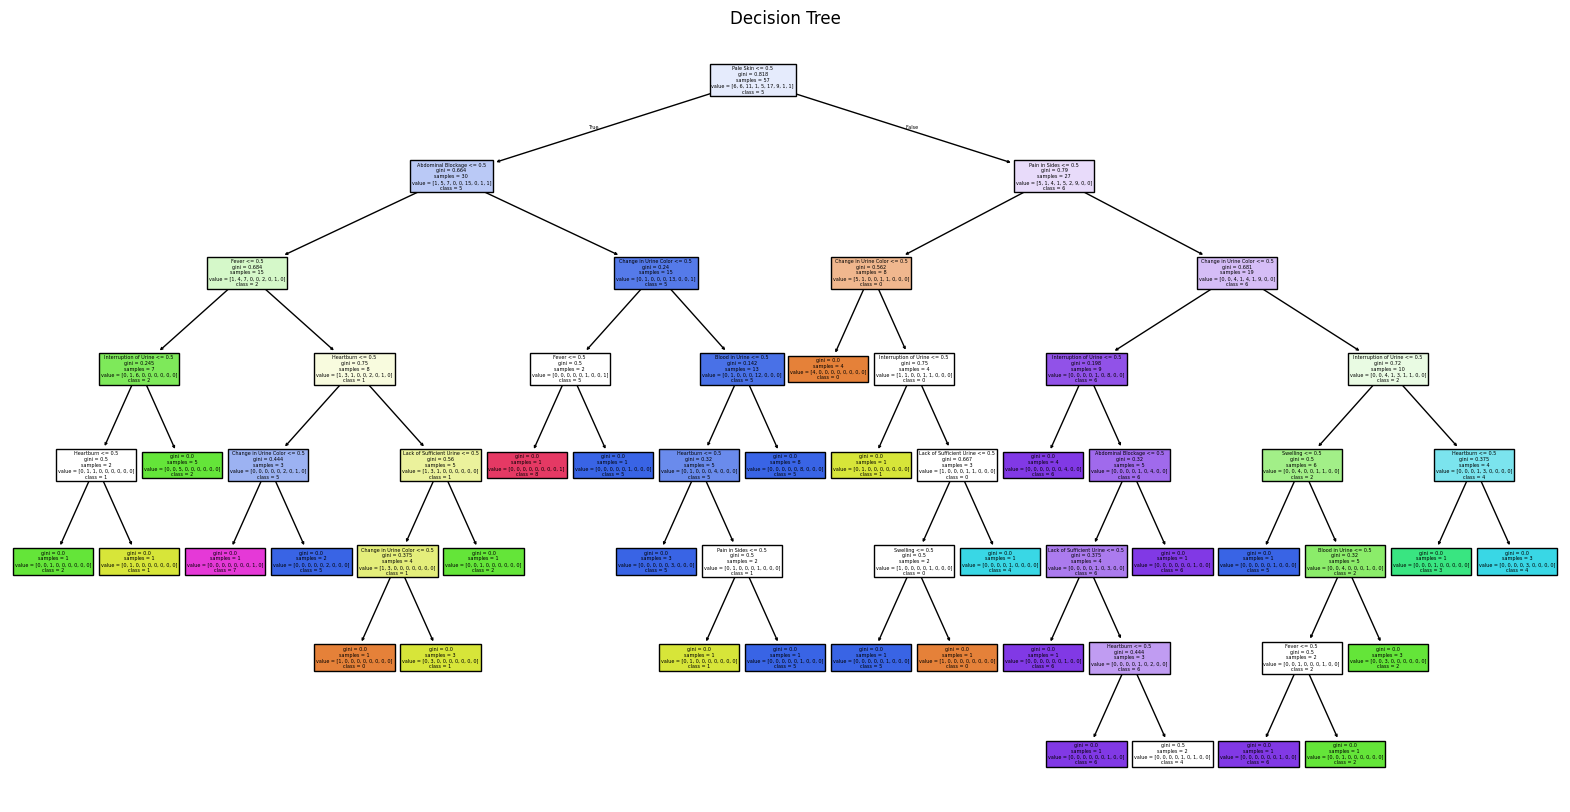

Confusion Matrix:
[[0 1 0 0 2 0 0 0]
 [0 1 1 0 0 1 0 0]
 [0 1 5 0 0 1 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 2 0 0 0]
 [0 1 0 0 0 5 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0]]


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
# Load the dataset (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your actual dataset path
# Encode categorical variables
label_encoder = LabelEncoder()
# Apply label encoding to all categorical columns
for column in df.columns[:-1]:  # Exclude the target column 'Diagnosis'
    df[column] = label_encoder.fit_transform(df[column])
# Encode the target variable
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
# Split features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
# Split into training and test sets without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Convert the encoded labels back to their original string labels for plotting
class_names = [str(c) for c in label_encoder.inverse_transform(range(len(label_encoder.classes_)))]
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree")
plt.show()
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))